# سوال 5  
## درس شبکه های عصبی مصنوعی - پاییز 1404

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# تنظیمات نمایش
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
np.random.seed(42)

##  Air Quality :  بارگذاری و آماده‌سازی دیتاست 

In [48]:
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')

# حذف ستون‌های خالی
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

# تبدیل ستون‌های عددی و جایگزین کردن -200
for col in df.columns:
    if col not in ['Date', 'Time']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].replace(-200, np.nan)
        
df = df.dropna()

print(f"-تعداد نمونه ها: {len(df)}")
print(f"- تعداد ستون ها: {df.shape[1]}")
print(df.describe())

-تعداد نمونه ها: 827
- تعداد ستون ها: 15
           CO(GT)  PT08.S1(CO)     NMHC(GT)    C6H6(GT)  PT08.S2(NMHC)  \
count  827.000000   827.000000   827.000000  827.000000     827.000000   
mean     2.353567  1207.879081   231.025393   10.771100     966.116082   
std      1.409496   241.816997   208.461912    7.418134     266.424557   
min      0.300000   753.000000     7.000000    0.500000     448.000000   
25%      1.300000  1017.000000    77.000000    4.800000     754.000000   
50%      2.000000  1172.000000   157.000000    9.100000     944.000000   
75%      3.100000  1380.000000   318.500000   14.800000    1142.500000   
max      8.100000  2040.000000  1189.000000   39.200000    1754.000000   

          NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  827.000000    827.000000  827.000000    827.000000   827.000000   
mean   143.501814    963.297461  100.259976   1600.620314  1045.812576   
std     81.829717    265.914168   31.493823    302.291793   400.134662

In [49]:
df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
11,11/03/2004,05.00.00,0.7,1066.0,8.0,1.1,512.0,16.0,1918.0,28.0,1182.0,422.0,11.0,56.2,0.7366


CO(GT)
 غلظت گاز مونوکسید کربن (CO)

PT08.S1(CO)
 CO خروجی سنسور شماره 1 برای تشخیص گاز 

NMHC(GT)
 Non-Methane Hydrocarbons (هیدروکربن‌های غیرمتانی) مقدار واقعی 

C6H6(GT)
 غلظت بنزن در هوا

PT08.S2(NMHC)
 خروجی خام سنسور شماره 2

NOx(GT)
 مقدار واقعی اکسیدهای نیتروژن (NO + NO₂)

PT08.S3(NOx)
 خروجی سنسور شماره 3
 NOx مخصوص تشخیص 

NO2(GT)
 (NO₂) مقدار واقعی دی‌اکسید نیتروژن 

PT08.S5(O3)
 خروجی سنسور شماره 5
 (O₃) مخصوص تشخیص ازون 

T 
دما

RH
 رطوبت نسبی (Relative Humidity)

AH
رطوبت مطلق (Absolute Humidity)

In [51]:
# انتخاب ویژگی‌های ورودی و هدف
feature_cols = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'T', 'RH', 'AH']
target_col = 'NOx(GT)'

X = df[feature_cols].values
y = df[target_col].values.reshape(-1, 1)

print(f"  - میانگین X: {X.mean(axis=0).round(2)}")
print(f"  - میانگین y: {y.mean():.2f}")
print(f"  - بیشینه y: {y.max():.2f}، کمینه y: {y.min():.2f}")

  - میانگین X: [2.35000e+00 1.20788e+03 1.07700e+01 1.56000e+01 4.90500e+01 8.30000e-01]
  - میانگین y: 143.50
  - بیشینه y: 478.00، کمینه y: 12.00


In [52]:
# نرمال‌سازی داده‌ها
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# تقسیم به آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42)

print(f"  - Number of Training_set: {X_train.shape[0]}")
print(f"  - Number of Testing_set: {X_test.shape[0]}")

  - Number of Training_set: 661
  - Number of Testing_set: 166


## پیاده سازی شبکه عصبی ساده

In [54]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size=4, output_size=1, 
                 activation='linear', learning_rate=0.1, 
                 adaptive=False, adaptive_lr=False, decay=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation = activation
        self.learning_rate = learning_rate
        self.adaptive = adaptive
        self.adaptive_lr = adaptive_lr
        self.decay = decay
        # مقدارهای اولیه وزن‌ها و بایاس‌ها
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))
        self.v_W1 = np.zeros_like(self.W1)
        self.v_b1 = np.zeros_like(self.b1)
        self.v_W2 = np.zeros_like(self.W2)
        self.v_b2 = np.zeros_like(self.b2)
        self.losses = []
        self.train_accuracies = []
        self.test_accuracies = []

    def linear(self, x):
        return x

    def linear_derivative(self, x):
        return np.ones_like(x)

    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        sig = self.sigmoid(x)
        return sig * (1 - sig)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        if self.activation == 'linear':
            self.a1 = self.linear(self.z1)
        else:
            self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.z2
        return self.a2

    def backward(self, X, y):
        m = X.shape[0]
        dz2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        da1 = np.dot(dz2, self.W2.T)
        if self.activation == 'linear':
            dz1 = da1 * self.linear_derivative(self.z1)
        else:
            dz1 = da1 * self.sigmoid_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        return dW1, db1, dW2, db2

    def update_weights(self, dW1, db1, dW2, db2, epoch, lr):
        if self.adaptive:
            beta = 0.9
            self.v_W1 = beta * self.v_W1 - (1 - beta) * lr * dW1
            self.v_b1 = beta * self.v_b1 - (1 - beta) * lr * db1
            self.v_W2 = beta * self.v_W2 - (1 - beta) * lr * dW2
            self.v_b2 = beta * self.v_b2 - (1 - beta) * lr * db2
            self.W1 += self.v_W1
            self.b1 += self.v_b1
            self.W2 += self.v_W2
            self.b2 += self.v_b2
        else:
            self.W1 -= lr * dW1
            self.b1 -= lr * db1
            self.W2 -= lr * dW2
            self.b2 -= lr * db2

    def mse_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)

    def train(self, X_train, y_train, X_test, y_test, epochs=100):
        self.losses = []
        self.train_accuracies = []
        self.test_accuracies = []
        for epoch in range(epochs):
            if self.adaptive_lr:
                current_lr = self.learning_rate / (1 + self.decay * epoch)
            else:
                current_lr = self.learning_rate
            y_pred_train = self.forward(X_train)
            loss = self.mse_loss(y_pred_train, y_train)
            self.losses.append(loss)
            dW1, db1, dW2, db2 = self.backward(X_train, y_train)
            self.update_weights(dW1, db1, dW2, db2, epoch, current_lr)
            train_mae = np.mean(np.abs(y_pred_train - y_train))
            y_pred_test = self.forward(X_test)
            test_mae = np.mean(np.abs(y_pred_test - y_test))
            self.train_accuracies.append(train_mae)
            self.test_accuracies.append(test_mae)
            if (epoch + 1) % 20 == 0:
                print(f"Epoch {epoch+1:3d}/{epochs} | Loss: {loss:.6f} | Train MAE: {train_mae:.6f} | Test MAE: {test_mae:.6f}")

    def predict(self, X):
        return self.forward(X)

z1:
خروجی خام لایه پنهان (قبل از تابع فعالسازی)

a1:
خروجی لایه پنهان (بعد از تابع فعالسازی)

z2:
خروجی خام لایه خروجی (قبل از تابع فعالسازی)

a2:
a2=z2 (در اینجا همیشه خطی است)
خروجی نهایی شبکه (پیش‌بینی)

dz2:
گرادیان خطا در لایه خروجی

dW2:
گرادیان وزن‌های لایه دوم

db2:
گرادیان بایاس لایه دوم

da1:
گرادیان خطا در لایه پنهان (قبل از مشتق تابع فعالسازی)

dz1:
گرادیان خطا در لایه پنهان (بعد از مشتق تابع فعالسازی)

dW1:
گرادیان وزن‌های لایه اول

db1
گرادیان بایاس لایه اول

losses:
لیست تابع هزینه در هر ایپاک 
MSE

m = تعداد نمونه‌ها

In [56]:
# آموزش مدل با حالت نرخ ثابت
model_fixed = SimpleNeuralNetwork(
    input_size=6, hidden_size=8, output_size=1,
    activation='sigmoid', learning_rate=0.1,
    adaptive=False, adaptive_lr=False
)
model_fixed.train(X_train, y_train, X_test, y_test, epochs=200)

# آموزش مدل با حالت فقط Adaptive LR
model_adaptive = SimpleNeuralNetwork(
    input_size=6, hidden_size=8, output_size=1,
    activation='sigmoid', learning_rate=0.1,
    adaptive=False, adaptive_lr=True, decay=0.01
)
model_adaptive.train(X_train, y_train, X_test, y_test, epochs=200)

# آموزش مدل با حالتی که هم Momentum هم Adaptive LR فعال است
model_adaptive_momentum = SimpleNeuralNetwork(
    input_size=6, hidden_size=8, output_size=1,
    activation='sigmoid', learning_rate=0.1,
    adaptive=True, adaptive_lr=True, decay=0.01
)
model_adaptive_momentum.train(X_train, y_train, X_test, y_test, epochs=200)


Epoch  20/200 | Loss: 0.966465 | Train MAE: 0.782031 | Test MAE: 0.788299
Epoch  40/200 | Loss: 0.856164 | Train MAE: 0.732175 | Test MAE: 0.735628
Epoch  60/200 | Loss: 0.602847 | Train MAE: 0.601458 | Test MAE: 0.605929
Epoch  80/200 | Loss: 0.331909 | Train MAE: 0.431383 | Test MAE: 0.439203
Epoch 100/200 | Loss: 0.194110 | Train MAE: 0.320177 | Test MAE: 0.327553
Epoch 120/200 | Loss: 0.143932 | Train MAE: 0.271188 | Test MAE: 0.279699
Epoch 140/200 | Loss: 0.122854 | Train MAE: 0.252617 | Test MAE: 0.258519
Epoch 160/200 | Loss: 0.110944 | Train MAE: 0.242950 | Test MAE: 0.245010
Epoch 180/200 | Loss: 0.103164 | Train MAE: 0.235657 | Test MAE: 0.235388
Epoch 200/200 | Loss: 0.097926 | Train MAE: 0.230228 | Test MAE: 0.228868
Epoch  20/200 | Loss: 0.902183 | Train MAE: 0.755484 | Test MAE: 0.761482
Epoch  40/200 | Loss: 0.737174 | Train MAE: 0.676298 | Test MAE: 0.681810
Epoch  60/200 | Loss: 0.531293 | Train MAE: 0.562927 | Test MAE: 0.571822
Epoch  80/200 | Loss: 0.360631 | Train

##  شبکه عصبی با تابع فعالسازی خطی

In [58]:
# آموزش مدل خطی
model_linear = SimpleNeuralNetwork(
    input_size=6,
    hidden_size=16,
    output_size=1,
    activation='linear',
    learning_rate=0.1,
    adaptive=False
)

model_linear.train(X_train, y_train, X_test, y_test, epochs=200)

# ارزیابی
y_pred_linear = model_linear.predict(X_test)
test_loss_linear = model_linear.mse_loss(y_pred_linear, y_test)
print(f"\n MSE: {test_loss_linear:.6f}")
print(f" MAE: {np.mean(np.abs(y_pred_linear - y_test)):.6f}")

Epoch  20/200 | Loss: 0.084515 | Train MAE: 0.216351 | Test MAE: 0.225243
Epoch  40/200 | Loss: 0.079640 | Train MAE: 0.210442 | Test MAE: 0.217595
Epoch  60/200 | Loss: 0.079057 | Train MAE: 0.209627 | Test MAE: 0.216495
Epoch  80/200 | Loss: 0.078730 | Train MAE: 0.209217 | Test MAE: 0.216239
Epoch 100/200 | Loss: 0.078457 | Train MAE: 0.208844 | Test MAE: 0.216186
Epoch 120/200 | Loss: 0.078222 | Train MAE: 0.208509 | Test MAE: 0.216145
Epoch 140/200 | Loss: 0.078019 | Train MAE: 0.208232 | Test MAE: 0.216146
Epoch 160/200 | Loss: 0.077841 | Train MAE: 0.208007 | Test MAE: 0.216140
Epoch 180/200 | Loss: 0.077685 | Train MAE: 0.207821 | Test MAE: 0.216163
Epoch 200/200 | Loss: 0.077547 | Train MAE: 0.207669 | Test MAE: 0.216182

 MSE: 0.081400
 MAE: 0.216182


##   شبکه عصبی با تابع فعالسازی سیگموئید

In [60]:
model_sigmoid = SimpleNeuralNetwork(
    input_size=6,
    hidden_size=16,
    output_size=1,
    activation='sigmoid',
    learning_rate=0.1,
    adaptive=False
)


model_sigmoid.train(X_train, y_train, X_test, y_test, epochs=200)

# ارزیابی
y_pred_sigmoid = model_sigmoid.predict(X_test)
test_loss_sigmoid = model_sigmoid.mse_loss(y_pred_sigmoid, y_test)
print(f"\n MSE: {test_loss_sigmoid:.6f}")
print(f" MAE: {np.mean(np.abs(y_pred_sigmoid - y_test)):.6f}")

Epoch  20/200 | Loss: 0.738003 | Train MAE: 0.681541 | Test MAE: 0.687984
Epoch  40/200 | Loss: 0.415185 | Train MAE: 0.499377 | Test MAE: 0.503328
Epoch  60/200 | Loss: 0.204243 | Train MAE: 0.338324 | Test MAE: 0.342663
Epoch  80/200 | Loss: 0.133928 | Train MAE: 0.265644 | Test MAE: 0.270918
Epoch 100/200 | Loss: 0.110898 | Train MAE: 0.242974 | Test MAE: 0.248352
Epoch 120/200 | Loss: 0.099719 | Train MAE: 0.233370 | Test MAE: 0.236022
Epoch 140/200 | Loss: 0.093009 | Train MAE: 0.227168 | Test MAE: 0.227546
Epoch 160/200 | Loss: 0.088799 | Train MAE: 0.222590 | Test MAE: 0.222036
Epoch 180/200 | Loss: 0.086151 | Train MAE: 0.219130 | Test MAE: 0.217912
Epoch 200/200 | Loss: 0.084478 | Train MAE: 0.216852 | Test MAE: 0.215156

 MSE: 0.080861
 MAE: 0.215156


In [61]:
# محاسبه خطاها و مقایسه
y_pred_fixed = model_fixed.predict(X_test)
y_pred_adaptive = model_adaptive.predict(X_test)
y_pred_adaptive_momentum = model_adaptive_momentum.predict(X_test)

print('Fixed LR MSE:', model_fixed.mse_loss(y_pred_fixed, y_test))
print('Adaptive LR MSE:', model_adaptive.mse_loss(y_pred_adaptive, y_test))
print('Adaptive LR + Momentum MSE:', model_adaptive_momentum.mse_loss(y_pred_adaptive_momentum, y_test))


Fixed LR MSE: 0.0941193235265766
Adaptive LR MSE: 0.12179823206744055
Adaptive LR + Momentum MSE: 0.15050410030410047


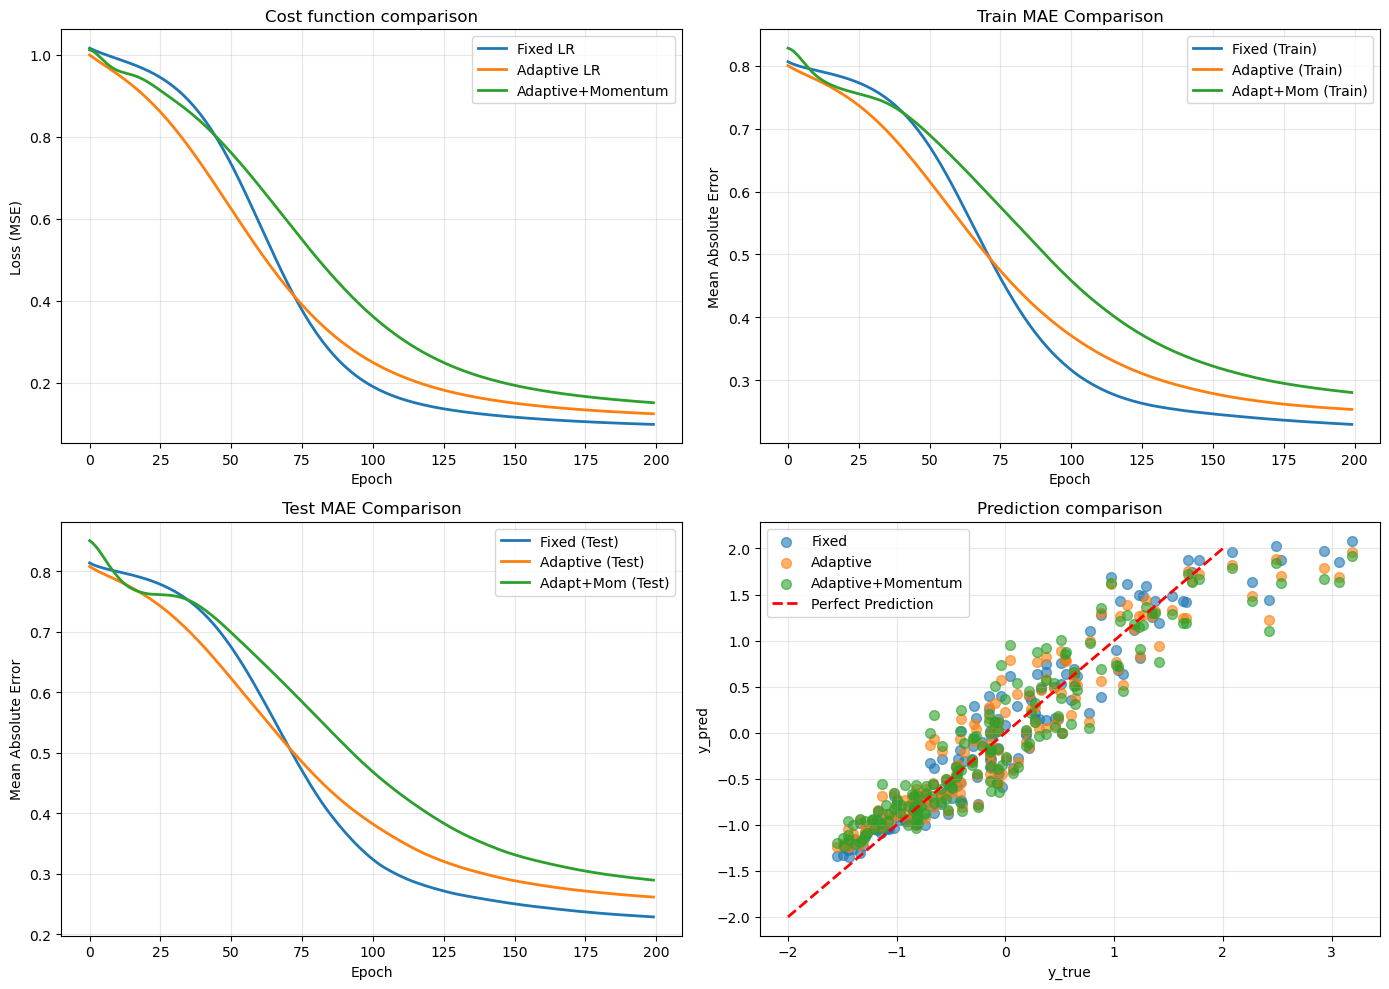

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# (1) نمودار 1: تابع هزینه برای همه مدل‌ها
axes[0, 0].plot(model_fixed.losses, label='Fixed LR', linewidth=2)
axes[0, 0].plot(model_adaptive.losses, label='Adaptive LR', linewidth=2)
axes[0, 0].plot(model_adaptive_momentum.losses, label='Adaptive+Momentum', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].set_title('Cost function comparison')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# (2) نمودار 2: خطای آموزش (MAE) همه مدل‌ها
axes[0, 1].plot(model_fixed.train_accuracies, label='Fixed (Train)', linewidth=2)
axes[0, 1].plot(model_adaptive.train_accuracies, label='Adaptive (Train)', linewidth=2)
axes[0, 1].plot(model_adaptive_momentum.train_accuracies, label='Adapt+Mom (Train)', linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Mean Absolute Error')
axes[0, 1].set_title('Train MAE Comparison')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# (3) نمودار 3: خطای تست (MAE) همه مدل‌ها
axes[1, 0].plot(model_fixed.test_accuracies, label='Fixed (Test)', linewidth=2)
axes[1, 0].plot(model_adaptive.test_accuracies, label='Adaptive (Test)', linewidth=2)
axes[1, 0].plot(model_adaptive_momentum.test_accuracies, label='Adapt+Mom (Test)', linewidth=2)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Mean Absolute Error')
axes[1, 0].set_title('Test MAE Comparison')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# (4) نمودار 4: مقایسه پیش‌بینی‌ها برای همه مدل‌ها
axes[1, 1].scatter(y_test, y_pred_fixed, alpha=0.6, label='Fixed', s=50)
axes[1, 1].scatter(y_test, y_pred_adaptive, alpha=0.6, label='Adaptive', s=50)
axes[1, 1].scatter(y_test, y_pred_adaptive_momentum, alpha=0.6, label='Adaptive+Momentum', s=50)
axes[1, 1].plot([-2, 2], [-2, 2], 'r--', linewidth=2, label='Perfect Prediction')
axes[1, 1].set_xlabel('y_true')
axes[1, 1].set_ylabel('y_pred')
axes[1, 1].set_title('Prediction comparison')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [63]:
comparison_df = pd.DataFrame({
    'metric': [
        'Final Train Error',
        'MAE',
        'MSE',
        'train accuracies',
        'test accuracies'
    ],
    'Linear': [
        f"{test_loss_linear:.6f}",
        f"{np.mean(np.abs(y_pred_linear - y_test)):.6f}",
        f"{min(model_linear.losses):.6f}",
        f"{min(model_linear.train_accuracies):.6f}",
        f"{min(model_linear.test_accuracies):.6f}"
    ],
    'Sigmoid': [
        f"{test_loss_sigmoid:.6f}",
        f"{np.mean(np.abs(y_pred_sigmoid - y_test)):.6f}",
        f"{min(model_sigmoid.losses):.6f}",
        f"{min(model_sigmoid.train_accuracies):.6f}",
        f"{min(model_sigmoid.test_accuracies):.6f}"
    ]
})

print("\n" + comparison_df.to_string(index=False))
if test_loss_sigmoid < test_loss_linear:
    
    print(f" sigmoid function is better ")
else:
    print(f"\nlinear function is better")


           metric   Linear  Sigmoid
Final Train Error 0.081400 0.080861
              MAE 0.216182 0.215156
              MSE 0.077547 0.084478
 train accuracies 0.207669 0.216852
  test accuracies 0.216139 0.215156
 sigmoid function is better 


## Check for overfitting...
این کد را برای این اضافه کردم چون میخواستم ببینم مدل بیش برازش نشده باشد

##  بررسی تاثیر پارامتر ها در تابع خطی

In [66]:
# تأثیر تعداد نورون‌های لایه پنهان
hidden_sizes = [2, 4, 8, 16]
results_hidden = []

print("\n The Effect of N Neurons:")
for hs in hidden_sizes:
    model = SimpleNeuralNetwork(
        input_size=6, hidden_size=hs, output_size=1,
        activation='sigmoid', learning_rate=0.1
    )
    model.train(X_train, y_train, X_test, y_test, epochs=200)
    y_pred = model.predict(X_test)
    loss = model.mse_loss(y_pred, y_test)
    results_hidden.append(loss)
    print(f" Number of Neurons : {hs:2d} →  MSE: {loss:.6f}")

# تأثیر نرخ یادگیری
learning_rates = [0.001, 0.01, 0.05, 0.1]
results_lr = []

print("\n effect of learning rate:")
for lr in learning_rates:
    model = SimpleNeuralNetwork(
        input_size=6, hidden_size=16, output_size=1,
        activation='sigmoid', learning_rate=lr
    )
    model.train(X_train, y_train, X_test, y_test, epochs=200)
    y_pred = model.predict(X_test)
    loss = model.mse_loss(y_pred, y_test)
    results_lr.append(loss)
    print(f"learning rate: {lr:0.003f} → loss MSE: {loss:.6f}")


 The Effect of N Neurons:
Epoch  20/200 | Loss: 0.933829 | Train MAE: 0.771155 | Test MAE: 0.779994
Epoch  40/200 | Loss: 0.793427 | Train MAE: 0.705426 | Test MAE: 0.712678
Epoch  60/200 | Loss: 0.562525 | Train MAE: 0.579711 | Test MAE: 0.588865
Epoch  80/200 | Loss: 0.360657 | Train MAE: 0.448716 | Test MAE: 0.461005
Epoch 100/200 | Loss: 0.244620 | Train MAE: 0.358326 | Test MAE: 0.369315
Epoch 120/200 | Loss: 0.187502 | Train MAE: 0.308496 | Test MAE: 0.315468
Epoch 140/200 | Loss: 0.158303 | Train MAE: 0.282280 | Test MAE: 0.289577
Epoch 160/200 | Loss: 0.141363 | Train MAE: 0.267499 | Test MAE: 0.273981
Epoch 180/200 | Loss: 0.130348 | Train MAE: 0.257570 | Test MAE: 0.262349
Epoch 200/200 | Loss: 0.122706 | Train MAE: 0.250793 | Test MAE: 0.253201
 Number of Neurons :  2 →  MSE: 0.122153
Epoch  20/200 | Loss: 0.894750 | Train MAE: 0.751979 | Test MAE: 0.758420
Epoch  40/200 | Loss: 0.695622 | Train MAE: 0.653019 | Test MAE: 0.659718
Epoch  60/200 | Loss: 0.434547 | Train MAE: 

وقتی تعداد نورون ها را زیاد میکنیم خطا کاهش میابد و هرچه مقدار ضریب یادگیری را افزایش میدهیم خطا نیز کاهش میابد

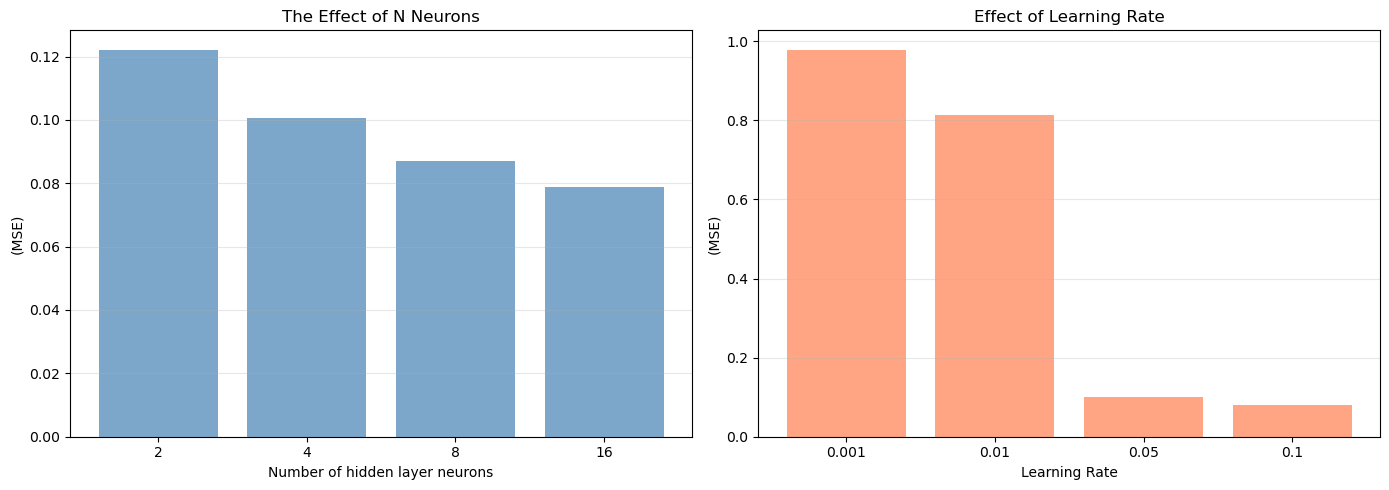

In [68]:
# نمودار تأثیر پارامترها
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# نمودار تعداد نورون‌ها
axes[0].bar(range(len(hidden_sizes)), results_hidden, alpha=0.7, color='steelblue')
axes[0].set_xticks(range(len(hidden_sizes)))
axes[0].set_xticklabels([str(hs) for hs in hidden_sizes])
axes[0].set_xlabel('Number of hidden layer neurons')
axes[0].set_ylabel('(MSE)')
axes[0].set_title('The Effect of N Neurons')
axes[0].grid(True, alpha=0.3, axis='y')

# نمودار نرخ یادگیری
axes[1].bar(range(len(learning_rates)), results_lr, alpha=0.7, color='coral')
axes[1].set_xticks(range(len(learning_rates)))
axes[1].set_xticklabels([str(lr) for lr in learning_rates])
axes[1].set_xlabel('Learning Rate')
axes[1].set_ylabel('(MSE)')
axes[1].set_title('Effect of Learning Rate')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [69]:
# تحلیل نتایج
best_hidden_idx = np.argmin(results_hidden)
best_lr_idx = np.argmin(results_lr)

print(f"The Best N of Neurons: {hidden_sizes[best_hidden_idx]} (Error: {results_hidden[best_hidden_idx]:.6f})")
print(f"The Best Learning Rate: {learning_rates[best_lr_idx]:.3f} (Error: {results_lr[best_lr_idx]:.6f})")

The Best N of Neurons: 16 (Error: 0.078857)
The Best Learning Rate: 0.100 (Error: 0.079534)


##   مقایسه نرخ یادگیری ثابت و وفقی

In [71]:
# مدل با نرخ ثابت
print("\nModel with Fixed learning rate:")
model_fixed = SimpleNeuralNetwork(
    input_size=6, hidden_size=16, output_size=1,
    activation='sigmoid', learning_rate=0.1, adaptive=False
)
model_fixed.train(X_train, y_train, X_test, y_test, epochs=200)
y_pred_fixed = model_fixed.predict(X_test)
loss_fixed = model_fixed.mse_loss(y_pred_fixed, y_test)

# مدل با نرخ وفقی
print("\nModel with adaptive learning rate (Momentum):")
model_adaptive = SimpleNeuralNetwork(
    input_size=6, hidden_size=16, output_size=1,
    activation='sigmoid', learning_rate=0.1, adaptive=True
)
model_adaptive.train(X_train, y_train, X_test, y_test, epochs=200)
y_pred_adaptive = model_adaptive.predict(X_test)
loss_adaptive = model_adaptive.mse_loss(y_pred_adaptive, y_test)

print(f"- Fixed rate - MSE: {loss_fixed:.6f}")
print(f"- Adapted rate - MSE: {loss_adaptive:.6f}")


Model with Fixed learning rate:
Epoch  20/200 | Loss: 0.721991 | Train MAE: 0.667133 | Test MAE: 0.668985
Epoch  40/200 | Loss: 0.370129 | Train MAE: 0.463980 | Test MAE: 0.467217
Epoch  60/200 | Loss: 0.182964 | Train MAE: 0.315044 | Test MAE: 0.319317
Epoch  80/200 | Loss: 0.127839 | Train MAE: 0.259084 | Test MAE: 0.266139
Epoch 100/200 | Loss: 0.108255 | Train MAE: 0.241491 | Test MAE: 0.247033
Epoch 120/200 | Loss: 0.097728 | Train MAE: 0.232261 | Test MAE: 0.235447
Epoch 140/200 | Loss: 0.091229 | Train MAE: 0.225831 | Test MAE: 0.226935
Epoch 160/200 | Loss: 0.087161 | Train MAE: 0.221039 | Test MAE: 0.221463
Epoch 180/200 | Loss: 0.084630 | Train MAE: 0.217672 | Test MAE: 0.217563
Epoch 200/200 | Loss: 0.083053 | Train MAE: 0.215533 | Test MAE: 0.214822

Model with adaptive learning rate (Momentum):
Epoch  20/200 | Loss: 0.869789 | Train MAE: 0.742780 | Test MAE: 0.747674
Epoch  40/200 | Loss: 0.621017 | Train MAE: 0.617297 | Test MAE: 0.622851
Epoch  60/200 | Loss: 0.314460 |

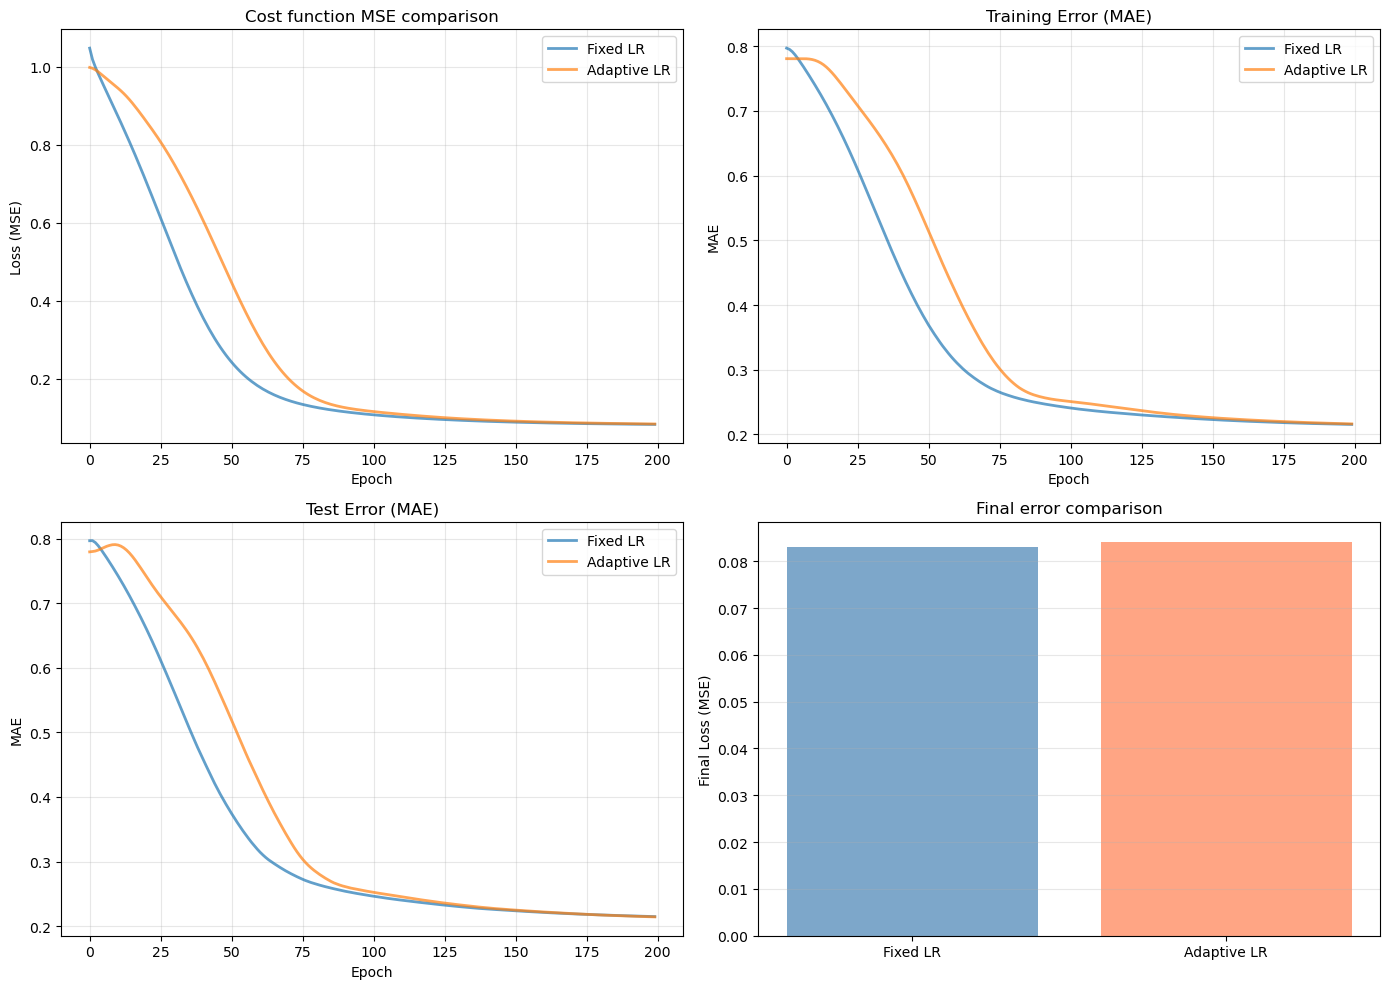

In [72]:

loss_fixed = min(model_fixed.losses)
loss_adaptive = min(model_adaptive.losses)

# loss_adaptive_momentum = min(model_adaptive_momentum.losses)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(model_fixed.losses, label='Fixed LR', linewidth=2, alpha=0.7)
axes[0, 0].plot(model_adaptive.losses, label='Adaptive LR', linewidth=2, alpha=0.7)
# axes[0, 0].plot(model_adaptive_momentum.losses, label='Adaptive LR + Momentum', linewidth=2, alpha=0.7)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].set_title('Cost function MSE comparison')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(model_fixed.train_accuracies, label='Fixed LR', linewidth=2, alpha=0.7)
axes[0, 1].plot(model_adaptive.train_accuracies, label='Adaptive LR', linewidth=2, alpha=0.7)
# axes[0, 1].plot(model_adaptive_momentum.train_accuracies, label='Adaptive LR + Momentum', linewidth=2, alpha=0.7)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_title('Training Error (MAE)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(model_fixed.test_accuracies, label='Fixed LR', linewidth=2, alpha=0.7)
axes[1, 0].plot(model_adaptive.test_accuracies, label='Adaptive LR', linewidth=2, alpha=0.7)
# axes[1, 0].plot(model_adaptive_momentum.test_accuracies, label='Adaptive LR + Momentum', linewidth=2, alpha=0.7)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_title('Test Error (MAE)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

methods = ['Fixed LR', 'Adaptive LR']   # اگرMomentum داری اضافه کن
final_losses = [loss_fixed, loss_adaptive]  # اگرMomentum داری اضافه کن
axes[1, 1].bar(methods, final_losses, alpha=0.7, color=['steelblue', 'coral'])
axes[1, 1].set_ylabel('Final Loss (MSE)')
axes[1, 1].set_title('Final error comparison')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


چون مقدار نرخ یادگیری بالاست یعنی 0.1 است مومنتوم به ما کمکی نکرد و چه بسا حالت ثابت در این پیاده سازی بهتر کار کرد

LR بالا → Momentum نزن


LR پایین → Momentum بزن


LR متوسط → هر دو امتحان کن!

In [75]:
# R2_score محاسبه 
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")

R2 Score: 0.9219


In [77]:
# خطای آموزشی
train_mae = min(model.train_accuracies)
# خطای آزمایشی
test_mae = min(model.test_accuracies)

print(f"\nBest Train MAE: {train_mae:.6f}")
print(f"Best Test MAE:  {test_mae:.6f}")
print(f"Gap (overfitting indicator): {abs(train_mae - test_mae):.6f}")

if abs(train_mae - test_mae) > 0.1:
    print("\n⚠️  WARNING: Large gap! Possible overfitting")
    print("   → Consider reducing learning rate")
else:
    print("\n✅ Gap is reasonable")



Best Train MAE: 0.215652
Best Test MAE:  0.214819
Gap (overfitting indicator): 0.000833

✅ Gap is reasonable


In [79]:
# کلاس شبکه با چند لایه پنهان
class MultiLayerNN:    
    def __init__(self, layer_sizes, learning_rate=0.1):

        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.num_layers = len(layer_sizes) - 1
        
        # مقداردهی اولیه وزن‌ها و بایاس‌ها
        self.weights = []
        self.biases = []
        
        for i in range(self.num_layers):
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.1
            b = np.zeros((1, layer_sizes[i+1]))
            self.weights.append(w)
            self.biases.append(b)
        
        # برای ذخیره نتایج
        self.losses = []
        self.test_accuracies = []
    
    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        sig = self.sigmoid(x)
        return sig * (1 - sig)
    
    def forward(self, X):
        self.activations = [X]  # a0 = X
        self.z_values = []
        
        for i in range(self.num_layers):
            # محاسبه z
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(z)
            
            # محاسبه activation
            if i == self.num_layers - 1:  # لایه آخر (خروجی)
                a = z  # بدون activation
            else:  # لایه‌های پنهان
                a = self.sigmoid(z)
            
            self.activations.append(a)
        
        return self.activations[-1]
    
    def backward(self, X, y):
        m = X.shape[0]
        
        # لیست گرادیان‌ها
        dW = [None] * self.num_layers
        db = [None] * self.num_layers
        
        # خطای لایه آخر
        delta = self.activations[-1] - y
        
        # Backpropagation
        for i in reversed(range(self.num_layers)):
            # محاسبه گرادیان‌ها
            dW[i] = np.dot(self.activations[i].T, delta) / m
            db[i] = np.sum(delta, axis=0, keepdims=True) / m
            
            # انتقال خطا به لایه قبلی
            if i > 0:
                delta = np.dot(delta, self.weights[i].T)
                delta = delta * self.sigmoid_derivative(self.z_values[i-1])
        
        return dW, db
    
    def update_weights(self, dW, db):
        for i in range(self.num_layers):
            self.weights[i] -= self.learning_rate * dW[i]
            self.biases[i] -= self.learning_rate * db[i]
    
    def mse_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)
    
    def train(self, X_train, y_train, X_test, y_test, epochs=200):
        for epoch in range(epochs):
            # Forward
            y_pred = self.forward(X_train)
            loss = self.mse_loss(y_pred, y_train)
            self.losses.append(loss)
            
            # Backward
            dW, db = self.backward(X_train, y_train)
            
            # Update
            self.update_weights(dW, db)
            
            # Test error
            y_pred_test = self.forward(X_test)
            test_mae = np.mean(np.abs(y_pred_test - y_test))
            self.test_accuracies.append(test_mae)
            
            if (epoch + 1) % 50 == 0:
                print(f"    Epoch {epoch+1:3d}/{epochs} | Loss: {loss:.6f} | Test MAE: {test_mae:.6f}")
    
    def predict(self, X):
        return self.forward(X)


# تست با تعداد لایه‌های مختلف
layer_configs = [
    {
        'name': '1 layer',
        'layers': [6, 8, 1]  # ورودی → 8 نورون → خروجی
    },
    {
        'name': '2 layer',
        'layers': [6, 8, 4, 1]  # ورودی → 8 نورون → 4 نورون → خروجی
    },
    {
        'name': '3 layer',
        'layers': [6, 8, 6, 4, 1]  # ورودی → 8 → 6 → 4 → خروجی
    }
]

results_layers = []

for config in layer_configs:
    print(f"\nTrain with {config['name']}: {config['layers']}")
    
    model = MultiLayerNN(
        layer_sizes=config['layers'],
        learning_rate=0.1
    )
    
    model.train(X_train, y_train, X_test, y_test, epochs=200)
    
    # ارزیابی نهایی
    y_pred = model.predict(X_test)
    final_mse = model.mse_loss(y_pred, y_test)
    final_mae = np.mean(np.abs(y_pred - y_test))
    
    results_layers.append({
        'name': config['name'],
        'layers': config['layers'],
        'mse': final_mse,
        'mae': final_mae
    })
    
    print(f"\n Final Result:")
    print(f"    MSE: {final_mse:.6f}")
    print(f"    MAE: {final_mae:.6f}")


Train with 1 layer: [6, 8, 1]
    Epoch  50/200 | Loss: 0.442103 | Test MAE: 0.517415
    Epoch 100/200 | Loss: 0.123530 | Test MAE: 0.261130
    Epoch 150/200 | Loss: 0.097094 | Test MAE: 0.231842
    Epoch 200/200 | Loss: 0.089504 | Test MAE: 0.220683

 Final Result:
    MSE: 0.087129
    MAE: 0.220683

Train with 2 layer: [6, 8, 4, 1]
    Epoch  50/200 | Loss: 0.992880 | Test MAE: 0.805247
    Epoch 100/200 | Loss: 0.991713 | Test MAE: 0.804828
    Epoch 150/200 | Loss: 0.989820 | Test MAE: 0.804122
    Epoch 200/200 | Loss: 0.986503 | Test MAE: 0.802837

 Final Result:
    MSE: 1.014492
    MAE: 0.802837

Train with 3 layer: [6, 8, 6, 4, 1]
    Epoch  50/200 | Loss: 0.994379 | Test MAE: 0.805652
    Epoch 100/200 | Loss: 0.994372 | Test MAE: 0.805648
    Epoch 150/200 | Loss: 0.994365 | Test MAE: 0.805645
    Epoch 200/200 | Loss: 0.994357 | Test MAE: 0.805641

 Final Result:
    MSE: 1.022691
    MAE: 0.805641
